# *Traffic Sign Recognizer - 99% accuracy*

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import load_model
from sklearn.metrics import confusion_matrix
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [2]:
# data_dir = '../input/gtsrb-german-traffic-sign'
# train_path = '../input/gtsrb-german-traffic-sign/Train'
# test_path = '../input/gtsrb-german-traffic-sign/'

# Resizing the images to 32x32x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

## Finding Total Classes

In [3]:
NUM_CATEGORIES = 43

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Collecting the Training Data

In [ ]:
# image_data = []
# image_labels = []

# for i in range(NUM_CATEGORIES):
#     path = data_dir + '/Train/' + str(i)
#     images = os.listdir(path)

#     for img in images:
#         try:
#             image = cv2.imread(path + '/' + img)
#             image_fromarray = Image.fromarray(image, 'RGB')
#             resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
#             image_data.append(np.array(resize_image))
#             image_labels.append(i)
#         except:
#             print("Error in " + img)

# # Changing the list to numpy array
# image_data = np.array(image_data)
# image_labels = np.array(image_labels)

# print(image_data.shape, image_labels.shape)

In [10]:
# Opening file for reading in binary mode
import pickle
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    image_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
image_data['x_train'] = image_data['x_train'].transpose(0, 2, 3, 1)
image_data['x_validation'] = image_data['x_validation'].transpose(0, 2, 3, 1)
image_data['x_test'] = image_data['x_test'].transpose(0, 2, 3, 1)

X_train = image_data['x_train']
X_test = image_data['x_test']
X_valid = image_data['x_validation']
y_train = image_data['y_train']
y_test = image_data['y_test']
y_valid = image_data['y_validation']

In [11]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)

gray_train_imgs = gray_data['x_train']
gray_test_imgs = gray_data['x_test']
gray_valid_imgs = gray_data['x_validation']
gray_train_labels = gray_data['y_train']
gray_test_labels = gray_data['y_test']
gray_valid_labels = gray_data['y_validation']

In [12]:
# gray_train_labels[gray_train_labels <= 10] = 0 #cycle
# gray_train_labels[gray_train_labels >= 32] = 0 #cycle
# gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0 #cycle
# gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 1 #triangle
# gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 1 #triangle
# gray_train_labels[gray_train_labels == 14] = 2 # 6
# gray_train_labels[gray_train_labels == 12] = 3 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 2 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4

# gray_valid_labels[gray_valid_labels <= 10] = 0 #cycle
# gray_valid_labels[gray_valid_labels >= 32] = 0 #cycle
# gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 0 #cycle
# gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 1 #triangle
# gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 1 #triangle
# gray_valid_labels[gray_valid_labels == 14] = 2 # 6
# gray_valid_labels[gray_valid_labels == 12] = 3 # 4

In [13]:
# gray_x_train = gray_train_imgs
gray_x_test = gray_test_imgs
# gray_x_valid = gray_valid_imgs

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 4

# One Hot Encoding
# gray_y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
gray_y_test = keras.utils.to_categorical(gray_test_labels, num_class_shape)
# gray_y_valid = keras.utils.to_categorical(gray_valid_labels, num_class_shape)

## Collecting the Test Data

In [ ]:
# test = pd.read_csv(data_dir + '/Test.csv')

# y_test = test["ClassId"].values
# imgs = test["Path"].values

# data =[]

# for img in imgs:
#     try:
#         image = cv2.imread(data_dir + '/' +img)
#         image_fromarray = Image.fromarray(image, 'RGB')
#         resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
#         data.append(np.array(resize_image))
#     except:
#         print("Error in " + img)
# X_test = np.array(data)
# X_test = X_test/255

## Shuffling the training data

In [ ]:
# shuffle_indexes = np.arange(image_data.shape[0])
# np.random.shuffle(shuffle_indexes)
# image_data = image_data[shuffle_indexes]
# image_labels = image_labels[shuffle_indexes]

## Splitting the data into train and validation set

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

# X_train = X_train/255 
# X_valid = X_valid/255

# print("X_train.shape", X_train.shape)
# print("X_valid.shape", X_valid.shape)
# print("y_train.shape", y_train.shape)
# print("y_valid.shape", y_val.shape)

In [14]:
y_test = image_data['y_test']

A = np.array(np.where(y_train >= 18))
A = np.concatenate((A ,np.where(y_train == 13)), axis = 1)
A = np.concatenate((A ,np.where(y_train == 11)), axis = 1)
B = np.array(np.where(y_train > 31))
indx = np.setdiff1d(A, B)

A = np.array(np.where(y_test >= 18)) 
A = np.concatenate((A ,np.where(y_test == 13)), axis = 1)
A = np.concatenate((A ,np.where(y_test == 11)), axis = 1)
B = np.array(np.where(y_test > 31))
indx1 = np.setdiff1d(A, B)

A = np.array(np.where(y_valid >= 18)) 
A = np.concatenate((A ,np.where(y_valid == 13)), axis = 1)
A = np.concatenate((A ,np.where(y_valid == 11)), axis = 1)
B = np.array(np.where(y_valid > 31))
indx2 = np.setdiff1d(A, B)

# tri_X_train = X_train[indx]
tri_X_test = X_test[indx1]
# tri_X_valid = X_valid[indx2]
# tri_y_train = y_train[indx]
tri_y_test = y_test[indx1]
# tri_y_valid = y_valid[indx2]

In [15]:
tri_Dict = {11:0 , 13:1 , 18:2 , 19:3 , 20:4 , 21:5 , 22:6 , 23:7 , 24:8 , 25:9 , 26:10 , 27:11 , 28:12 , 29:13 , 30:14 , 31:15 }
# tri_y_train = np.vectorize(tri_Dict.get)(tri_y_train)
# tri_y_test = np.vectorize(tri_Dict.get)(tri_y_test)
# tri_y_valid = np.vectorize(tri_Dict.get)(tri_y_valid)
tri_num_class = 16

In [16]:
indx = np.array(np.where(y_train <= 10)) #cycle
indx = np.concatenate((indx ,np.where(y_train >= 32)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(y_train == 15)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(y_train == 16)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(y_train == 17)), axis = 1) #cycle

indx1 = np.array(np.where(y_test <= 10)) #cycle
indx1 = np.concatenate((indx1 ,np.where(y_test >= 32)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(y_test == 15)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(y_test == 16)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(y_test == 17)), axis = 1) #cycle

indx2 = np.array(np.where(y_valid <= 10)) #cycle
indx2 = np.concatenate((indx2 ,np.where(y_valid >= 32)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(y_valid == 15)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(y_valid == 16)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(y_valid == 17)), axis = 1) #cycle

cycle_X_train = X_train[indx]
cycle_X_test = X_test[indx1]
cycle_X_valid = X_valid[indx2]
cycle_y_train = y_train[indx]
cycle_y_test = y_test[indx1]
cycle_y_valid = y_valid[indx2]

In [17]:
cy_Dict = {0:0 ,1:1 ,2:2, 3:3 , 4:4 , 5:5 , 6:6 , 7:7 , 8:8 , 9:9 ,10:10 ,11:15 , 12:16 , 13:17 , 14:32 , 15:33 , 16:34 , 17:35 , 18:36 , 19:37 , 20:38 , 21:39 , 22:40 , 23:41 , 24:42 }
# cycle_y_train = np.vectorize(cy_Dict.get)(cycle_y_train)
cycle_y_test = np.vectorize(cy_Dict.get)(cycle_y_test)
# cycle_y_valid = np.vectorize(cy_Dict.get)(cycle_y_valid)
cy_num_class = 25


## One hot encoding the labels

In [18]:
import keras
# y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
# y_valid = keras.utils.to_categorical(y_valid, NUM_CATEGORIES)
# y_test = keras.utils.to_categorical(y_test, NUM_CATEGORIES)

# cycle_y_train = keras.utils.to_categorical(cycle_y_train, cy_num_class)
# cycle_y_valid = keras.utils.to_categorical(cycle_y_valid, cy_num_class)
# tri_y_train = keras.utils.to_categorical(tri_y_train, tri_num_class)
# tri_y_valid = keras.utils.to_categorical(tri_y_valid, tri_num_class)


print(y_train.shape)
print(y_valid.shape)

(86989,)
(4410,)


## Ensemble Model

In [48]:
cy_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\cycle_classifier_model_acc98.h5')
tri_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\tri_classifier_model_acc96.h5')
shape_classifier = load_model( "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\shape_classifier_model (2).h5")

In [49]:
predictions = shape_classifier.predict(gray_x_test)
predictions = (predictions > 0.5).astype("int32")
print(predictions)


395/395 [==============================] - 2s 4ms/step
[[0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [60]:
tri_y_test = []
not_tri = []
# cycle_indx = np.where(shapes == 0)
triangle_indx = np.where(predictions[:,1] == 1)

tri1_y_test = y_test[triangle_indx]

for i in range(0 ,tri1_y_test.shape[0]):
    try:
        tri_y_test.append( tri_Dict[tri1_y_test[i]])

    except:
        not_tri.append(i)

tri_y_test = np.array(tri_y_test)
not_tri = np.array(not_tri)
# num_not_tri = tri_y_test[]
tri_labels = keras.utils.to_categorical(tri_y_test, 16)
tri_index = np.delete(triangle_indx , not_tri)

In [42]:
print(tri1_y_test[not_tri])

[10  6 38 12 12 38 12  3 10 38 38 12 38 38  5 38 40 40 38 10 12 38 38  5
 38  1 12 12 12 38 12 12 12 12]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Maryk\AppData\Local\Temp\ipykernel_15608\2437081918.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

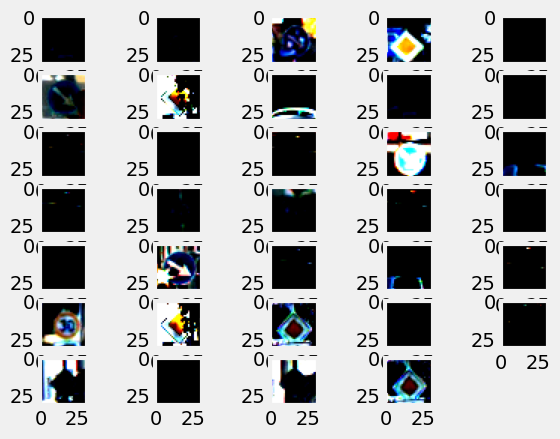

In [61]:

for i in range(1 , not_tri.shape[0]+1):
    plt.subplot(7,5,i)
    img = X_test[triangle_indx[0][not_tri[i - 1]]]
    plt.imshow(img)
    plt.grid(b=None)


In [62]:
tri_index = np.delete(triangle_indx , not_tri)

tri_class = tri_model.predict(X_test[tri_index])
tri_class = (tri_class > 0.5).astype("int32")

tri_acc = accuracy_score(tri_labels, tri_class)

# cy_class = cy_aug_model.predict_classes(X_test[cycle_indx])
# cy_acc = accuracy_score(y_test[cycle_indx], cy_class)

real_tri_acc = tri_acc * tri_y_test.shape[0] / len(triangle_indx[0])
print('tri Test Data accuracy: ',real_tri_acc * 100 )

110/110 [==============================] - 1s 6ms/step
tri Test Data accuracy:  95.55240793201133


In [ ]:
pred = np.zeros((y_test.shape))
cir_indx = np.where(predictions[:,0] == 1)
cir_pred = cy_model.predict(X_test[cir_indx])
cir_pred = np.vectorize(cy_Dict.get)(cir_pred)
pred[] = 

In [63]:
cy_y_test = []
not_cy = []
# cycle_indx = np.where(shapes == 0)
cycle_indx = np.where(predictions[:,0] == 1)

cy1_y_test = y_test[cycle_indx]

for i in range(0 ,cy1_y_test.shape[0]):
    try:
        cy_y_test.append( cy_Dict[cy1_y_test[i]])

    except:
        not_cy.append(i)

cy_y_test = np.array(cy_y_test)
not_cy = np.array(not_cy)
# num_not_cy = cy_y_test[]
cy_labels = keras.utils.to_categorical(cy_y_test,25)
cy_index = np.delete(cycle_indx , not_cy)

cy_class = cy_model.predict(X_test[cy_index])
cy_class = (cy_class > 0.5).astype("int32")


cy_acc = accuracy_score(cy_labels, cy_class)

# cy_class = cy_aug_model.predict_classes(X_test[cycle_indx])
# cy_acc = accuracy_score(y_test[cycle_indx], cy_class)
real_cy_acc = cy_acc * cy_y_test.shape[0] / len(cycle_indx[0])
print('cy Test Data accuracy: ',real_cy_acc * 100 )

254/254 [==============================] - 1s 4ms/step
cy Test Data accuracy:  97.39736070381232


In [40]:
print(not_cy.shape)

(59,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Maryk\AppData\Local\Temp\ipykernel_15608\1991425092.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

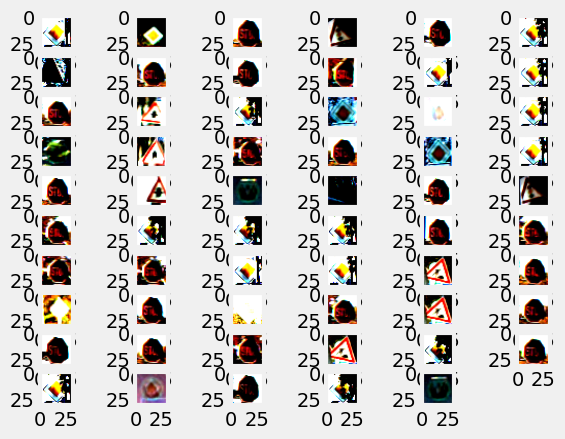

In [65]:

for i in range(1 , not_cy.shape[0]+1):
    plt.subplot(10,6,i)
    img = X_test[cycle_indx[0][not_cy[i - 1]]]
    plt.imshow(img)
    plt.grid(b=None)

In [66]:
real_cy_acc = cy_acc * cy_y_test.shape[0] / len(cycle_indx[0])
print('cy Test Data accuracy: ',real_cy_acc * 100 )

cy Test Data accuracy:  97.39736070381232


In [20]:
def classifiy(pred ):
    n = pred.shape[0]
    nc = pred.shape[1]
    new_cy_y = np.zeros((n))
    for i in range(0 ,nc):
        cycle_indx = np.where(pred[:,i] == 1)
        new_cy_y[cycle_indx] = i
    return new_cy_y

In [ ]:
print(classifiy(cy_class))

In [21]:
cy_cm = confusion_matrix(cy_y_test, classifiy(cy_class))
tri_cm = confusion_matrix(tri_y_test, classifiy(tri_class))
num_per_class = np.ones((43))
acc_per_class = np.zeros((43))
for i in range(0 , 43):
    try:
        ii = tri_Dict[i]
        num_per_class[i] = len(np.where(y_test == i)[0])
        acc_per_class[i] = tri_cm[ii , ii] / num_per_class[i]

    except:
        try:
            ii = cy_Dict[i]
            num_per_class[i] = len(np.where(y_test == i)[0])
            acc_per_class[i] = cy_cm[ii , ii] / num_per_class[i]

        except:
            print(i)
for i , j in [3 , 12],[2 , 14]:
    pred = np.array(np.where(predictions[:,i] == 1))
    pred = pred.reshape((pred.shape[1]))
    true_y = np.array(np.where(y_test == j))
    true_y = true_y.reshape((true_y.shape[1]))
    tp = np.intersect1d(true_y , pred).shape[0]
    num_per_class[j] = len(np.where(y_test == j)[0])
    acc_per_class[j] =  tp / num_per_class[j]

12
14


In [22]:
for i in range(0 , 43):
    print(i , acc_per_class[i] , num_per_class[i])

0 0.9833333333333333 60.0
1 0.9888888888888889 720.0
2 0.9813333333333333 750.0
3 0.98 450.0
4 0.9712121212121212 660.0
5 0.953968253968254 630.0
6 0.82 150.0
7 0.98 450.0
8 0.9911111111111112 450.0
9 1.0 480.0
10 0.9848484848484849 660.0
11 0.9714285714285714 420.0
12 0.9507246376811594 690.0
13 0.9930555555555556 720.0
14 0.9111111111111111 270.0
15 1.0 210.0
16 0.9933333333333333 150.0
17 0.9611111111111111 360.0
18 0.9615384615384616 390.0
19 1.0 60.0
20 1.0 90.0
21 0.6777777777777778 90.0
22 0.9583333333333334 120.0
23 0.9933333333333333 150.0
24 0.9888888888888889 90.0
25 0.9479166666666666 480.0
26 0.8555555555555555 180.0
27 0.9833333333333333 60.0
28 0.9933333333333333 150.0
29 1.0 90.0
30 0.9133333333333333 150.0
31 0.9925925925925926 270.0
32 1.0 60.0
33 1.0 210.0
34 0.9916666666666667 120.0
35 0.9974358974358974 390.0
36 0.9666666666666667 120.0
37 1.0 60.0
38 0.9739130434782609 690.0
39 1.0 90.0
40 0.9777777777777777 90.0
41 0.85 60.0
42 0.9 90.0


In [23]:
TP = acc_per_class * num_per_class

prohibitory_indx = np.array([0 , 1 , 2 , 3 , 4 , 5 , 7 , 8 , 9 , 10 , 15 , 16])
danger_indx = np.array([11 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25, 26, 27, 28 , 29 , 30 , 31])
mandatory_indx = range(33 , 40)
other_indx = np.array([41 , 32 ,17 , 14 , 13 , 12 , 6])

prohibitory = TP[prohibitory_indx].sum()
danger = TP[danger_indx].sum()
mandatory = TP[mandatory_indx].sum()
other = TP[other_indx].sum()

num_prohibitory = num_per_class[prohibitory_indx].sum()
num_danger = num_per_class[danger_indx].sum()
num_mandatory = num_per_class[mandatory_indx].sum()
num_other = num_per_class[other_indx].sum()

In [25]:
acc_prohibitory = prohibitory/num_prohibitory
acc_danger = danger/num_danger
acc_mandatory = mandatory/num_mandatory
acc_other = other/num_other

print(acc_prohibitory , acc_danger, acc_mandatory ,acc_other)

0.981657848324515 0.9530465949820789 0.9857142857142858 0.9510822510822511


## Classification Reaport

In [50]:
a = classification_report(cy_labels, cy_class , output_dict = True)
b = classification_report(tri_labels, tri_class , output_dict = True)
c = classification_report(predictions , gray_y_test , output_dict = True)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
reaport = np.zeros((43 , 4))
for i in range(0 , 43):
    try:
        ii = tri_Dict[i]
        dic = b[str(ii)]
        reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])

    except:
        try:
            ii = cy_Dict[i]
            dic = a[str(ii)]
            reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])
        except:
            if(i == 12):
                dic = c["3"]
                reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])
            else :
                dic = c["2"]
                reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])

In [81]:
for i in range(0 , 43):
    print(reaport[i , 0], "\t",reaport[i , 1],"\t",reaport[i , 2],"\t",reaport[i , 3])
    print("\n")

1.0 	 0.9833333333333333 	 0.9915966386554621 	 60.0


0.9700272479564033 	 0.9902642559109874 	 0.9800412938747419 	 719.0


0.9800266311584553 	 0.9813333333333333 	 0.9806795469686875 	 750.0


0.9504310344827587 	 0.9821826280623608 	 0.9660460021905805 	 449.0


0.990726429675425 	 0.9712121212121212 	 0.9808722264728386 	 660.0


0.9724919093851133 	 0.9570063694267515 	 0.9646869983948635 	 628.0


1.0 	 0.825503355704698 	 0.9044117647058824 	 149.0


0.9910112359550561 	 0.98 	 0.9854748603351954 	 450.0


0.9911111111111112 	 0.9911111111111112 	 0.9911111111111112 	 450.0


0.9795918367346939 	 1.0 	 0.9896907216494846 	 480.0


0.9954058192955589 	 0.989345509893455 	 0.9923664122137404 	 657.0


0.9146067415730337 	 0.9760191846522782 	 0.9443155452436194 	 417.0


0.9507246376811594 	 1.0 	 0.974739970282318 	 656.0


0.99721059972106 	 0.9986033519553073 	 0.9979064898813679 	 716.0


0.9111111111111111 	 0.9461538461538461 	 0.9283018867924527 	 260.0


0.99056603773584

In [161]:
def mul_sup(a):
    for i in range(0 , 3):
        a[:,i] *= a[:,3]
    a = a.sum(axis = 0)
    for i in range(0,3):
        a[i] /= a[3]
        a[i] = round(a[i],4) * 100
    return a

In [162]:
prohibitory = mul_sup(reaport[prohibitory_indx,:])
danger = mul_sup(reaport[danger_indx,:])
mandatory = mul_sup(reaport[mandatory_indx,:])
other = mul_sup(reaport[other_indx,:])

In [171]:
print("               pre    recall   f1_score sup")
print("prohibitory",prohibitory)
print("danger     ",danger)
print("mandatory  ",mandatory)
print("other      ",other)

               pre    recall   f1_score sup
prohibitory [  98.08   98.29   98.17 5663.  ]
danger      [  95.97   95.61   95.62 2780.  ]
mandatory   [  99.17   99.28   99.22 1668.  ]
other       [  96.62   97.73   97.07 2248.  ]
